In [58]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine("sqlite:///mta.db")
all_data = pd.read_sql('SELECT * FROM mta_data;', engine)


Cleaning Data

In [59]:
all_data = all_data.drop(index=[0,1])
print(all_data.head())

     CA  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/12/2020  03:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/12/2020  07:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/12/2020  11:00:00   
5  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/12/2020  15:00:00   
6  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/12/2020  19:00:00   

      DESC  ENTRIES    EXITS  
2  REGULAR  7502259  2554852  
3  REGULAR  7502264  2554865  
4  REGULAR  7502294  2554920  
5  REGULAR  7502382  2554941  
6  REGULAR  7502539  2554977  


# 1. Handling Missing Values

In [60]:
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143047 entries, 2 to 3143048
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   CA        object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   object
 10  EXITS     object
dtypes: object(11)
memory usage: 287.8+ MB
None


Drop If there is any Missing Value

In [61]:
all_data.dropna()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,03:00:00,REGULAR,7502259,2554852
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,07:00:00,REGULAR,7502264,2554865
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,11:00:00,REGULAR,7502294,2554920
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,15:00:00,REGULAR,7502382,2554941
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,19:00:00,REGULAR,7502539,2554977
...,...,...,...,...,...,...,...,...,...,...,...
3143044,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,544
3143045,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,544
3143046,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,544
3143047,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,REGULAR,5554,544


# 2. Handling Duplicates

FOR SAKE OF CONVINIENCE WE ARE TAKING REGULAR SCHEDULED AUDITS ONLY

In [62]:
not_regular = all_data[all_data['DESC'] != 'REGULAR']

In [63]:
print(not_regular.count)

<bound method DataFrame.count of            CA  UNIT       SCP          STATION LINENAME DIVISION        DATE  \
11661    A064  R311  00-00-00           BOWERY       JZ      BMT  12/12/2020   
11703    A064  R311  00-03-00           BOWERY       JZ      BMT  12/12/2020   
11745    A064  R311  00-03-01           BOWERY       JZ      BMT  12/12/2020   
16079    B020  R263  00-06-00         AVENUE H       BQ      BMT  12/14/2020   
16082    B020  R263  00-06-00         AVENUE H       BQ      BMT  12/15/2020   
...       ...   ...       ...              ...      ...      ...         ...   
3141100  R730  R431  00-00-00  EASTCHSTER/DYRE        5      IRT  03/24/2021   
3141142  R730  R431  00-00-01  EASTCHSTER/DYRE        5      IRT  03/24/2021   
3141184  R730  R431  00-00-02  EASTCHSTER/DYRE        5      IRT  03/24/2021   
3141226  R730  R431  00-00-03  EASTCHSTER/DYRE        5      IRT  03/24/2021   
3141268  R730  R431  00-00-04  EASTCHSTER/DYRE        5      IRT  03/24/2021   

      

In [64]:
all_data = all_data[all_data["DESC"] == "REGULAR"]
all_data.shape

(3129661, 11)

In [65]:
all_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,03:00:00,REGULAR,7502259,2554852
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,07:00:00,REGULAR,7502264,2554865
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,11:00:00,REGULAR,7502294,2554920
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,15:00:00,REGULAR,7502382,2554941
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,19:00:00,REGULAR,7502539,2554977


In [66]:
all_data.sort_values(["CA", "UNIT", "SCP", "STATION", "DATE", "TIME"], 
                          inplace=True, ascending=False)
all_data.drop_duplicates(subset=["CA", "UNIT", "SCP", "STATION", "DATE", "TIME"], inplace=True)
all_data.shape

(3129661, 11)

In [69]:
import datetime

all_data["DATE_TIME"] = pd.to_datetime(all_data.DATE + " " + all_data.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
all_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
633649,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2020,20:00:00,REGULAR,5554,541,2020-12-31 20:00:00
633648,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2020,16:00:00,REGULAR,5554,541,2020-12-31 16:00:00
633647,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2020,12:00:00,REGULAR,5554,541,2020-12-31 12:00:00
633646,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2020,08:00:00,REGULAR,5554,541,2020-12-31 08:00:00
633645,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2020,04:00:00,REGULAR,5554,541,2020-12-31 04:00:00


In [70]:
all_data.sort_values(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True)

In [72]:
all_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,03:00:00,REGULAR,7502259,2554852,2020-12-12 03:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,07:00:00,REGULAR,7502264,2554865,2020-12-12 07:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,11:00:00,REGULAR,7502294,2554920,2020-12-12 11:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,15:00:00,REGULAR,7502382,2554941,2020-12-12 15:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,19:00:00,REGULAR,7502539,2554977,2020-12-12 19:00:00


In [73]:
local_df = all_data.copy()

In [74]:
duplicates = (local_df
 .groupby(["CA", "UNIT", "SCP", "STATION", "DATE", "TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

In [75]:
duplicates = duplicates[duplicates["ENTRIES"]>1]

In [76]:
print(duplicates.count)
all_data.shape

<bound method DataFrame.count of Empty DataFrame
Columns: [CA, UNIT, SCP, STATION, DATE, TIME, ENTRIES]
Index: []>


(3129661, 12)

WE CAN SEE THAT THERE ARE NO DUPLICATES

Demonestration to see as there are no duplicates

# 3. Handling Outliers

CREATE CREATE DATE_TIME COLUMN

In [79]:
all_data.shape
copy_all_data = all_data.copy()

In [121]:
new_data = (all_data
                        .groupby(["CA", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

new_data.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-12-12,7502665
1,A002,R051,02-00-00,59 ST,2020-12-13,7502975
2,A002,R051,02-00-00,59 ST,2020-12-14,7503517
3,A002,R051,02-00-00,59 ST,2020-12-15,7504151
4,A002,R051,02-00-00,59 ST,2020-12-16,7504699


In [80]:
all_data[["PREV_DATE_TIME", "PREV_ENTRIES", "PREV_EXIT"]] = (all_data
                                                       .groupby(["CA", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-80-e8980f5dba1c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_data[["PREV_DATE_TIME", "PREV_ENTRIES", "PREV_EXIT"]] = (all_data


In [81]:
all_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE_TIME,PREV_ENTRIES,PREV_EXIT
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,03:00:00,REGULAR,7502259,2554852,2020-12-12 03:00:00,NaT,NaN,NaN
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,07:00:00,REGULAR,7502264,2554865,2020-12-12 07:00:00,2020-12-12 03:00:00,7502259,2554852
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,11:00:00,REGULAR,7502294,2554920,2020-12-12 11:00:00,2020-12-12 07:00:00,7502264,2554865
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,15:00:00,REGULAR,7502382,2554941,2020-12-12 15:00:00,2020-12-12 11:00:00,7502294,2554920
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,19:00:00,REGULAR,7502539,2554977,2020-12-12 19:00:00,2020-12-12 15:00:00,7502382,2554941


In [82]:
all_data.dropna(subset=["PREV_DATE_TIME","PREV_ENTRIES","PREV_EXIT"], axis=0, inplace=True)

In [83]:
all_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE_TIME,PREV_ENTRIES,PREV_EXIT
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,07:00:00,REGULAR,7502264,2554865,2020-12-12 07:00:00,2020-12-12 03:00:00,7502259,2554852
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,11:00:00,REGULAR,7502294,2554920,2020-12-12 11:00:00,2020-12-12 07:00:00,7502264,2554865
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,15:00:00,REGULAR,7502382,2554941,2020-12-12 15:00:00,2020-12-12 11:00:00,7502294,2554920
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,19:00:00,REGULAR,7502539,2554977,2020-12-12 19:00:00,2020-12-12 15:00:00,7502382,2554941
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,23:00:00,REGULAR,7502665,2554991,2020-12-12 23:00:00,2020-12-12 19:00:00,7502539,2554977


In [84]:
(all_data[all_data["ENTRIES"] < all_data["PREV_ENTRIES"]]
    .groupby(["CA", "UNIT", "SCP", "STATION"])
    .size())

CA    UNIT  SCP       STATION        
A002  R051  02-03-02  59 ST                1
A011  R080  01-03-00  57 ST-7 AV         611
            01-03-01  57 ST-7 AV           1
A014  R081  02-00-00  49 ST                1
A025  R023  01-06-00  34 ST-HERALD SQ      1
                                        ... 
R619  R059  00-03-00  GRAND ARMY PLAZ      1
R622  R123  00-00-00  FRANKLIN AV        615
R624  R124  00-00-02  KINGSTON AV          1
R627  R063  00-03-02  SUTTER AV-RUTLD      1
R730  R431  00-00-04  EASTCHSTER/DYRE    525
Length: 248, dtype: int64

There are 248 data poins rows where reverse counting has happended.

In [85]:
def get_hourly_entries(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter


def get_hourly_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXIT"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["EXITS"], row["PREV_EXIT"])
        counter = min(row["EXITS"], row["PREV_EXIT"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter


all_data["HOURLY_ENTRIES"] = all_data.apply(get_hourly_entries, axis=1, max_counter=15000)
all_data["HOULRY_EXITS"] = all_data.apply(get_hourly_exits, axis=1, max_counter=15000)


22 6641481
262144 0
52586 17116894
5 3055293
25 11715665
16 5102094
9 1630880
5 2642748
2 196944
327680 185586911
2323 986428
32 2172459
18 3039886
196632 13806
262147 459006
31 1657112
262165 328431
328567 262165
262144 328977
589880 262144
2514878 3480206
1638437 2515410
81 1638437
33 551960
262182 1028467
6 262209
0 2822958
327730 2642486
262158 526761
262144 0
1201695 1070555
1070667 1201695
21 475737951
16796390 123975
453044013 1779427
0 262586
262144 0
524292 262147
262147 524307
262147 524288
524311 262147
9 310200
262158 2255568
153 289677
57 2028804
38 4038371
16711948 6294995
23 16712719
161 66119
48 558400
25 3319940
3 131716
180 2773389
262144 4
17 67961027
0 589824
24 548915
37 44565
262147 655689
81 11567756
1815 13809461
589826 53246
9 7903750
26 681731
11 28491
2293766 4259757
15 1505340
8 885806
1376285 818298
62 1377273
50 827160459
75 157128
13 500623
0 67108864
17 2514854
1376312 8181460
159 4343900
262163 1566066
393218 1990
0 393218
19222 84959
393219 262179
35 1

In [87]:
all_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE_TIME,PREV_ENTRIES,PREV_EXIT,HOURLY_ENTRIES,HOULRY_EXITS
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,07:00:00,REGULAR,7502264,2554865,2020-12-12 07:00:00,2020-12-12 03:00:00,7502259,2554852,5,13
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,11:00:00,REGULAR,7502294,2554920,2020-12-12 11:00:00,2020-12-12 07:00:00,7502264,2554865,30,55
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,15:00:00,REGULAR,7502382,2554941,2020-12-12 15:00:00,2020-12-12 11:00:00,7502294,2554920,88,21
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,19:00:00,REGULAR,7502539,2554977,2020-12-12 19:00:00,2020-12-12 15:00:00,7502382,2554941,157,36
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,23:00:00,REGULAR,7502665,2554991,2020-12-12 23:00:00,2020-12-12 19:00:00,7502539,2554977,126,14


In [91]:
all_data["HOURLY_ENTRIES"].max()
all_data.rename(columns={'HOULRY_EXITS':'HOURLY_EXITS'}, inplace=True)
all_data["HOURLY_EXITS"].max()
all_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE_TIME,PREV_ENTRIES,PREV_EXIT,HOURLY_ENTRIES,HOURLY_EXITS
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,07:00:00,REGULAR,7502264,2554865,2020-12-12 07:00:00,2020-12-12 03:00:00,7502259,2554852,5,13
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,11:00:00,REGULAR,7502294,2554920,2020-12-12 11:00:00,2020-12-12 07:00:00,7502264,2554865,30,55
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,15:00:00,REGULAR,7502382,2554941,2020-12-12 15:00:00,2020-12-12 11:00:00,7502294,2554920,88,21
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,19:00:00,REGULAR,7502539,2554977,2020-12-12 19:00:00,2020-12-12 15:00:00,7502382,2554941,157,36
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,23:00:00,REGULAR,7502665,2554991,2020-12-12 23:00:00,2020-12-12 19:00:00,7502539,2554977,126,14


In [92]:
def buzyness(row):
    return row["HOURLY_ENTRIES"] + row["HOURLY_EXITS"]

In [93]:
all_data["buzyness"] = all_data.apply(buzyness, axis=1)

In [94]:
all_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE_TIME,PREV_ENTRIES,PREV_EXIT,HOURLY_ENTRIES,HOURLY_EXITS,buzyness
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,07:00:00,REGULAR,7502264,2554865,2020-12-12 07:00:00,2020-12-12 03:00:00,7502259,2554852,5,13,18
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,11:00:00,REGULAR,7502294,2554920,2020-12-12 11:00:00,2020-12-12 07:00:00,7502264,2554865,30,55,85
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,15:00:00,REGULAR,7502382,2554941,2020-12-12 15:00:00,2020-12-12 11:00:00,7502294,2554920,88,21,109
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,19:00:00,REGULAR,7502539,2554977,2020-12-12 19:00:00,2020-12-12 15:00:00,7502382,2554941,157,36,193
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,23:00:00,REGULAR,7502665,2554991,2020-12-12 23:00:00,2020-12-12 19:00:00,7502539,2554977,126,14,140


In [95]:
copy_processed_data = all_data.copy()

In [98]:
ca_unit_station_hourly = all_data.groupby(["CA", "UNIT", "STATION", "DATE_TIME"])[['buzyness']].sum().reset_index()
ca_unit_station_hourly.head()

,CA,UNIT,STATION,DATE_TIME,buzyness
0,A002,R051,59 ST,2020-12-12 07:00:00,179
1,A002,R051,59 ST,2020-12-12 11:00:00,1016
2,A002,R051,59 ST,2020-12-12 15:00:00,1153
3,A002,R051,59 ST,2020-12-12 19:00:00,1678
4,A002,R051,59 ST,2020-12-12 23:00:00,947


In [99]:
station_daily = all_data.groupby(["STATION", "DATE_TIME"])[['buzyness']].sum().reset_index()
station_daily.head()

,STATION,DATE_TIME,buzyness
0,1 AV,2020-12-12 07:00:00,325
1,1 AV,2020-12-12 11:00:00,1662
2,1 AV,2020-12-12 15:00:00,2935
3,1 AV,2020-12-12 19:00:00,3505
4,1 AV,2020-12-12 23:00:00,2213


In [100]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('buzyness', ascending=False)\
    .reset_index()

station_totals

,STATION,buzyness
0,34 ST-PENN STA,6547959
1,34 ST-HERALD SQ,5431681
2,86 ST,5094452
3,125 ST,4932920
4,GRD CNTRL-42 ST,4615069
...,...,...
373,ROCKAWAY PARK B,61275
374,BEACH 98 ST,27329
375,TOMPKINSVILLE,23899
376,BEACH 105 ST,15133


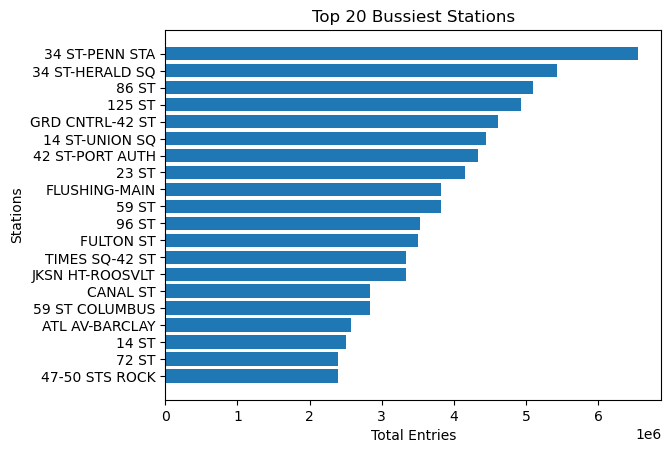

<Figure size 640x480 with 0 Axes>

In [103]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = station_totals["STATION"].iloc[0:20]
y_pos = np.arange(len(people))
performance = station_totals["buzyness"].iloc[0:20]

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Total Entries')
ax.set_ylabel('Stations')
ax.set_title('Top 20 Bussiest Stations')

plt.show()
plt.savefig('MVP.png')

In [105]:
copy_processed_data.shape

(3124629, 18)

In [106]:
station_daily.head(20)

,STATION,DATE_TIME,buzyness
0,1 AV,2020-12-12 07:00:00,325
1,1 AV,2020-12-12 11:00:00,1662
2,1 AV,2020-12-12 15:00:00,2935
3,1 AV,2020-12-12 19:00:00,3505
4,1 AV,2020-12-12 23:00:00,2213
5,1 AV,2020-12-13 03:00:00,482
6,1 AV,2020-12-13 07:00:00,192
7,1 AV,2020-12-13 11:00:00,1312
8,1 AV,2020-12-13 15:00:00,2978
9,1 AV,2020-12-13 19:00:00,3312


In [107]:
all_data.head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE_TIME,PREV_ENTRIES,PREV_EXIT,HOURLY_ENTRIES,HOURLY_EXITS,buzyness
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,07:00:00,REGULAR,7502264,2554865,2020-12-12 07:00:00,2020-12-12 03:00:00,7502259,2554852,5,13,18
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,11:00:00,REGULAR,7502294,2554920,2020-12-12 11:00:00,2020-12-12 07:00:00,7502264,2554865,30,55,85
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,15:00:00,REGULAR,7502382,2554941,2020-12-12 15:00:00,2020-12-12 11:00:00,7502294,2554920,88,21,109
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,19:00:00,REGULAR,7502539,2554977,2020-12-12 19:00:00,2020-12-12 15:00:00,7502382,2554941,157,36,193
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,23:00:00,REGULAR,7502665,2554991,2020-12-12 23:00:00,2020-12-12 19:00:00,7502539,2554977,126,14,140
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/13/2020,03:00:00,REGULAR,7502677,2554995,2020-12-13 03:00:00,2020-12-12 23:00:00,7502665,2554991,12,4,16
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/13/2020,07:00:00,REGULAR,7502681,2555002,2020-12-13 07:00:00,2020-12-13 03:00:00,7502677,2554995,4,7,11
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/13/2020,11:00:00,REGULAR,7502707,2555038,2020-12-13 11:00:00,2020-12-13 07:00:00,7502681,2555002,26,36,62
11,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/13/2020,15:00:00,REGULAR,7502770,2555074,2020-12-13 15:00:00,2020-12-13 11:00:00,7502707,2555038,63,36,99
12,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/13/2020,19:00:00,REGULAR,7502900,2555105,2020-12-13 19:00:00,2020-12-13 15:00:00,7502770,2555074,130,31,161


In [108]:
station_hourly = all_data.groupby(["STATION", "DATE_TIME","DATE","TIME"])[['buzyness']].sum().reset_index()
station_hourly.head()

,STATION,DATE_TIME,DATE,TIME,buzyness
0,1 AV,2020-12-12 07:00:00,12/12/2020,07:00:00,325
1,1 AV,2020-12-12 11:00:00,12/12/2020,11:00:00,1662
2,1 AV,2020-12-12 15:00:00,12/12/2020,15:00:00,2935
3,1 AV,2020-12-12 19:00:00,12/12/2020,19:00:00,3505
4,1 AV,2020-12-12 23:00:00,12/12/2020,23:00:00,2213


In [109]:
pick_hours = station_hourly.groupby('TIME').sum()\
    .sort_values('buzyness', ascending=False)\
    .reset_index()

pick_hours

,TIME,buzyness
0,19:00:00,43381613
1,11:00:00,33339387
2,20:00:00,31636649
3,15:00:00,30205832
4,16:00:00,28072108
...,...,...
59778,06:59:52,0
59779,09:36:11,0
59780,05:15:10,0
59781,09:36:31,0


In [110]:
import calendar
calendar.day_name[0]

station_hourly['WEEKDAYS'] = station_hourly['DATE_TIME'].dt.dayofweek

In [111]:
station_hourly.head()

,STATION,DATE_TIME,DATE,TIME,buzyness,WEEKDAYS
0,1 AV,2020-12-12 07:00:00,12/12/2020,07:00:00,325,5
1,1 AV,2020-12-12 11:00:00,12/12/2020,11:00:00,1662,5
2,1 AV,2020-12-12 15:00:00,12/12/2020,15:00:00,2935,5
3,1 AV,2020-12-12 19:00:00,12/12/2020,19:00:00,3505,5
4,1 AV,2020-12-12 23:00:00,12/12/2020,23:00:00,2213,5


In [113]:
def time_to_hour(time):
    """
    Input 00:00:00 (hour:minute:second).
    Extract and return the hour from input.
    """
    # return pd.to_datetime(time).hour
    return int(time.split(':')[0])

In [115]:
station_hourly["HOURS"] = station_hourly["TIME"].map(time_to_hour)
station_hourly.head()

,STATION,DATE_TIME,DATE,TIME,buzyness,WEEKDAYS,HOURS
0,1 AV,2020-12-12 07:00:00,12/12/2020,07:00:00,325,5,7
1,1 AV,2020-12-12 11:00:00,12/12/2020,11:00:00,1662,5,11
2,1 AV,2020-12-12 15:00:00,12/12/2020,15:00:00,2935,5,15
3,1 AV,2020-12-12 19:00:00,12/12/2020,19:00:00,3505,5,19
4,1 AV,2020-12-12 23:00:00,12/12/2020,23:00:00,2213,5,23


In [116]:
pick_hours = station_hourly.loc[(station_hourly["HOURS"]>=6) & (station_hourly["HOURS"]<=11)]
pick_hours.head()

,STATION,DATE_TIME,DATE,TIME,buzyness,WEEKDAYS,HOURS
0,1 AV,2020-12-12 07:00:00,12/12/2020,07:00:00,325,5,7
1,1 AV,2020-12-12 11:00:00,12/12/2020,11:00:00,1662,5,11
6,1 AV,2020-12-13 07:00:00,12/13/2020,07:00:00,192,6,7
7,1 AV,2020-12-13 11:00:00,12/13/2020,11:00:00,1312,6,11
12,1 AV,2020-12-14 07:00:00,12/14/2020,07:00:00,825,0,7


In [127]:
pick_hours_st = pick_hours.groupby(['WEEKDAYS','STATION']).sum()\
    .sort_values('buzyness', ascending=False)\
    .reset_index()
    

pick_hours_st

,WEEKDAYS,STATION,buzyness,HOURS
0,2,34 ST-PENN STA,320177,399
1,1,34 ST-PENN STA,311715,410
2,3,34 ST-PENN STA,299832,406
3,0,34 ST-PENN STA,287414,415
4,4,34 ST-PENN STA,266701,439
...,...,...,...,...
2641,5,NEPTUNE AV,159,121
2642,5,AVENUE I,158,121
2643,5,BEACH 105 ST,155,113
2644,6,BEACH 105 ST,126,122


In [131]:
pick_st = pick_hours.groupby(['STATION']).sum()\
    .sort_values('buzyness', ascending=False)\
    .reset_index()
    

pick_st

,STATION,buzyness,WEEKDAYS,HOURS
0,34 ST-PENN STA,1698880,965,2870
1,34 ST-HERALD SQ,1298017,611,1807
2,86 ST,1242619,939,2732
3,42 ST-PORT AUTH,1227267,953,2849
4,FLUSHING-MAIN,1182934,598,1785
...,...,...,...,...
373,BEACH 98 ST,5373,319,861
374,RIT-MANHATTAN,5186,315,853
375,TOMPKINSVILLE,5076,357,1067
376,BROAD CHANNEL,4187,305,837


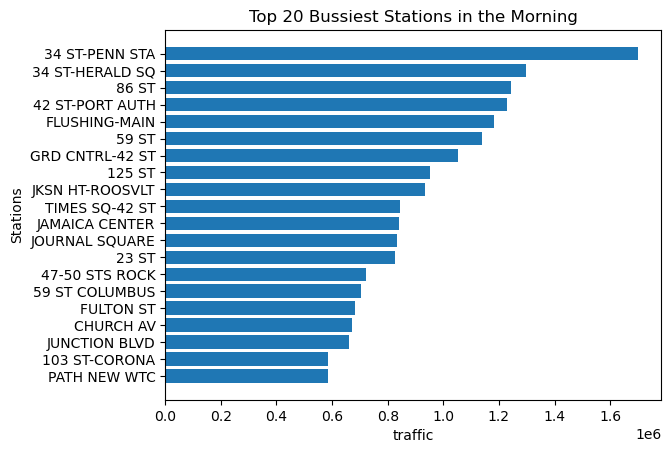

<Figure size 640x480 with 0 Axes>

In [140]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = pick_st["STATION"].iloc[0:20]
y_pos = np.arange(len(people))
performance = pick_st["buzyness"].iloc[0:20]

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('traffic')
ax.set_ylabel('Stations')
ax.set_title('Top 20 Bussiest Stations in the Morning')

plt.show()
plt.savefig('Busiest_Morning.png')


In [134]:
pick_hours_st.head()

,WEEKDAYS,STATION,buzyness,HOURS
0,2,34 ST-PENN STA,320177,399
1,1,34 ST-PENN STA,311715,410
2,3,34 ST-PENN STA,299832,406
3,0,34 ST-PENN STA,287414,415
4,4,34 ST-PENN STA,266701,439


In [137]:
pick_hours_st.drop_duplicates(subset = ['STATION'], keep = 'first', inplace = True) 

In [138]:
pick_hours_st.head()

,WEEKDAYS,STATION,buzyness,HOURS
0,2,34 ST-PENN STA,320177,399
5,2,34 ST-HERALD SQ,246438,259
7,2,42 ST-PORT AUTH,235794,399
8,2,86 ST,232260,449
14,2,59 ST,212790,250


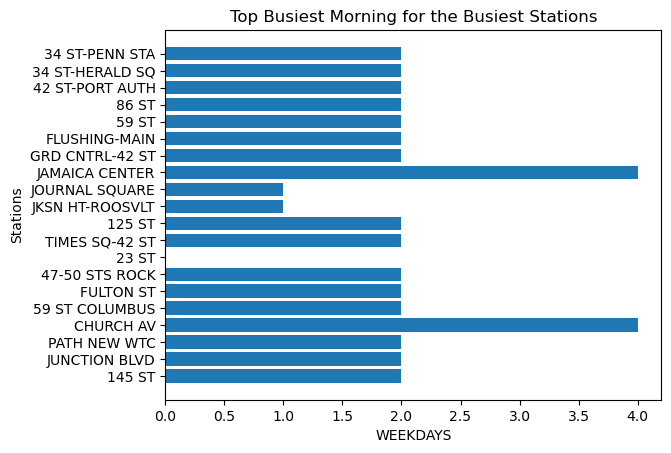

<Figure size 640x480 with 0 Axes>

In [141]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = pick_hours_st["STATION"].iloc[0:20]
y_pos = np.arange(len(people))
performance = pick_hours_st["WEEKDAYS"].iloc[0:20]

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('WEEKDAYS')
ax.set_ylabel('Stations')
ax.set_title('Top Busiest Morning for the Busiest Stations')

plt.show()
plt.savefig('Busiest-WeekDay.png')


In [143]:
import calendar

def change_cal(raw):
    return calendar.day_name[raw]

pick_hours_st.head()

,WEEKDAYS,STATION,buzyness,HOURS
0,2,34 ST-PENN STA,320177,399
5,2,34 ST-HERALD SQ,246438,259
7,2,42 ST-PORT AUTH,235794,399
8,2,86 ST,232260,449
14,2,59 ST,212790,250


In [144]:
pick_hours_st["WEEKDAYS"] = pick_hours_st["WEEKDAYS"].map(change_cal)

In [145]:
pick_hours_st.head(10)

,WEEKDAYS,STATION,buzyness,HOURS
0,Wednesday,34 ST-PENN STA,320177,399
5,Wednesday,34 ST-HERALD SQ,246438,259
7,Wednesday,42 ST-PORT AUTH,235794,399
8,Wednesday,86 ST,232260,449
14,Wednesday,59 ST,212790,250
16,Wednesday,FLUSHING-MAIN,212088,250
18,Wednesday,GRD CNTRL-42 ST,210959,372
22,Friday,JAMAICA CENTER,202537,250
29,Tuesday,JOURNAL SQUARE,194980,4459
35,Tuesday,JKSN HT-ROOSVLT,175941,261
